Import dependancies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

In [4]:
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer

creating df

In [5]:
tshisekedi=pd.read_excel("tshisekedi.xlsx")
tshisekedi.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1663618804293808129,RT @petertiani007 : Urgent !!Enlevement du Con...,Satcheas Sangwa Bin Albert,Satcheassangwa9,2023-05-30T18:50:06.000Z,Tue May 30 18:50:06 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Retweet,https://twitter.com/i/web/status/1663583625839...,0,1,photo,https://pbs.twimg.com/media/FxY8e4WWYAEpwLU.jpg,https://pbs.twimg.com/media/FxY8e4WWAAo6Te4.jpg,NaN,NaN
1,1663618764716351492,@FirminYangambi @SalomonKalonda Félix Tshiseke...,Joseph JKJ,JtsJKJ,2023-05-30T18:49:56.000Z,Tue May 30 18:49:56 +0000 2023,0,0,fr,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Reply,NaN,0,2,NaN,NaN,NaN,NaN,NaN
2,1663618707556278274,RT @PatrickLokala_ : Flash ! Le Régime de Féli...,Aphia Abakwere,AAbakwere,2023-05-30T18:49:43.000Z,Tue May 30 18:49:43 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Retweet,https://twitter.com/i/web/status/1663602231315...,0,0,photo,https://pbs.twimg.com/media/FxZKS6WWAA0u8-R.jpg,NaN,NaN,NaN
3,1663618701650796544,RT @FelixMugenzi : Un Militaire de @FARDC_off ...,Rwangeyo Rukaka,r_rukaka,2023-05-30T18:49:41.000Z,Tue May 30 18:49:41 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,3,4,photo,https://pbs.twimg.com/media/FxXh7MwWIAEhvB9.jpg,NaN,NaN,NaN
4,1663618553746976768,@kivurepublik @TinaSalama2 @DeniseNyakeru @Pat...,Africana,africanapulse,2023-05-30T18:49:06.000Z,Tue May 30 18:49:06 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,6,NaN,NaN,NaN,NaN,NaN


In [6]:
katumbi=pd.read_excel("katumbi.xlsx")
katumbi.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1663620310233411587,@TopCongo @SalomonKalonda @moise_katumbi C'est...,Kira Kandolo,kandolo_kira,2023-05-30T18:56:05.000Z,Tue May 30 18:56:05 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,3,NaN,NaN,NaN,NaN,NaN
1,1663620290398527489,RT @Kilosho7 : Nous dénonçons les accusations ...,Kilosho Museme,Kilosho7,2023-05-30T18:56:00.000Z,Tue May 30 18:56:00 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,2,5,video,https://video.twimg.com/ext_tw_video/166360556...,NaN,NaN,NaN
2,1663620194151923712,@oliverkalubi1 🤣 Bakangi chérie ya Moïse katumbi,Kabongo Richard,KabongoRichard4,2023-05-30T18:55:37.000Z,Tue May 30 18:55:37 +0000 2023,1,0,ht,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,1,NaN,NaN,NaN,NaN,NaN
3,1663620165198573571,@moise_katumbi @SalomonKalonda Mon président s...,Patient Mbayo,PatientMba56460,2023-05-30T18:55:30.000Z,Tue May 30 18:55:30 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,2,NaN,NaN,NaN,NaN,NaN
4,1663620156461858816,@DieuWedi1 @IsralMutombo11 @moise_katumbi @Sal...,Seven Kaf,kafludo,2023-05-30T18:55:28.000Z,Tue May 30 18:55:28 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,4,NaN,NaN,NaN,NaN,NaN


Data preprocessing and NLP analysis

In [7]:
def polarity(review):
    return TextBlob(review,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0]

In [8]:
tshisekedi['polarity']=tshisekedi['Text'].apply(polarity)
katumbi['polarity']=katumbi['Text'].apply(polarity)

In [9]:
tshisekedi.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18,polarity
0,1663618804293808129,RT @petertiani007 : Urgent !!Enlevement du Con...,Satcheas Sangwa Bin Albert,Satcheassangwa9,2023-05-30T18:50:06.000Z,Tue May 30 18:50:06 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Retweet,https://twitter.com/i/web/status/1663583625839...,0,1,photo,https://pbs.twimg.com/media/FxY8e4WWYAEpwLU.jpg,https://pbs.twimg.com/media/FxY8e4WWAAo6Te4.jpg,NaN,NaN,0.172917
1,1663618764716351492,@FirminYangambi @SalomonKalonda Félix Tshiseke...,Joseph JKJ,JtsJKJ,2023-05-30T18:49:56.000Z,Tue May 30 18:49:56 +0000 2023,0,0,fr,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Reply,NaN,0,2,NaN,NaN,NaN,NaN,NaN,-0.050000
2,1663618707556278274,RT @PatrickLokala_ : Flash ! Le Régime de Féli...,Aphia Abakwere,AAbakwere,2023-05-30T18:49:43.000Z,Tue May 30 18:49:43 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Retweet,https://twitter.com/i/web/status/1663602231315...,0,0,photo,https://pbs.twimg.com/media/FxZKS6WWAA0u8-R.jpg,NaN,NaN,NaN,0.080000
3,1663618701650796544,RT @FelixMugenzi : Un Militaire de @FARDC_off ...,Rwangeyo Rukaka,r_rukaka,2023-05-30T18:49:41.000Z,Tue May 30 18:49:41 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,3,4,photo,https://pbs.twimg.com/media/FxXh7MwWIAEhvB9.jpg,NaN,NaN,NaN,0.198000
4,1663618553746976768,@kivurepublik @TinaSalama2 @DeniseNyakeru @Pat...,Africana,africanapulse,2023-05-30T18:49:06.000Z,Tue May 30 18:49:06 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,6,NaN,NaN,NaN,NaN,NaN,0.100000


In [10]:
katumbi.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18,polarity
0,1663620310233411587,@TopCongo @SalomonKalonda @moise_katumbi C'est...,Kira Kandolo,kandolo_kira,2023-05-30T18:56:05.000Z,Tue May 30 18:56:05 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,3,NaN,NaN,NaN,NaN,NaN,0.2200
1,1663620290398527489,RT @Kilosho7 : Nous dénonçons les accusations ...,Kilosho Museme,Kilosho7,2023-05-30T18:56:00.000Z,Tue May 30 18:56:00 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,2,5,video,https://video.twimg.com/ext_tw_video/166360556...,NaN,NaN,NaN,0.0700
2,1663620194151923712,@oliverkalubi1 🤣 Bakangi chérie ya Moïse katumbi,Kabongo Richard,KabongoRichard4,2023-05-30T18:55:37.000Z,Tue May 30 18:55:37 +0000 2023,1,0,ht,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,1,NaN,NaN,NaN,NaN,NaN,0.5000
3,1663620165198573571,@moise_katumbi @SalomonKalonda Mon président s...,Patient Mbayo,PatientMba56460,2023-05-30T18:55:30.000Z,Tue May 30 18:55:30 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,2,NaN,NaN,NaN,NaN,NaN,-0.4500
4,1663620156461858816,@DieuWedi1 @IsralMutombo11 @moise_katumbi @Sal...,Seven Kaf,kafludo,2023-05-30T18:55:28.000Z,Tue May 30 18:55:28 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,4,NaN,NaN,NaN,NaN,NaN,0.2125


In [11]:
tshisekedi['expression']=np.where(tshisekedi['polarity']>0,'positive','negative')
tshisekedi.loc[tshisekedi.polarity==0,'expression']='natural'
tshisekedi.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,...,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18,polarity,expression
0,1663618804293808129,RT @petertiani007 : Urgent !!Enlevement du Con...,Satcheas Sangwa Bin Albert,Satcheassangwa9,2023-05-30T18:50:06.000Z,Tue May 30 18:50:06 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",...,https://twitter.com/i/web/status/1663583625839...,0,1,photo,https://pbs.twimg.com/media/FxY8e4WWYAEpwLU.jpg,https://pbs.twimg.com/media/FxY8e4WWAAo6Te4.jpg,NaN,NaN,0.172917,positive
1,1663618764716351492,@FirminYangambi @SalomonKalonda Félix Tshiseke...,Joseph JKJ,JtsJKJ,2023-05-30T18:49:56.000Z,Tue May 30 18:49:56 +0000 2023,0,0,fr,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,NaN,0,2,NaN,NaN,NaN,NaN,NaN,-0.050000,negative
2,1663618707556278274,RT @PatrickLokala_ : Flash ! Le Régime de Féli...,Aphia Abakwere,AAbakwere,2023-05-30T18:49:43.000Z,Tue May 30 18:49:43 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",...,https://twitter.com/i/web/status/1663602231315...,0,0,photo,https://pbs.twimg.com/media/FxZKS6WWAA0u8-R.jpg,NaN,NaN,NaN,0.080000,positive
3,1663618701650796544,RT @FelixMugenzi : Un Militaire de @FARDC_off ...,Rwangeyo Rukaka,r_rukaka,2023-05-30T18:49:41.000Z,Tue May 30 18:49:41 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",...,NaN,3,4,photo,https://pbs.twimg.com/media/FxXh7MwWIAEhvB9.jpg,NaN,NaN,NaN,0.198000,positive
4,1663618553746976768,@kivurepublik @TinaSalama2 @DeniseNyakeru @Pat...,Africana,africanapulse,2023-05-30T18:49:06.000Z,Tue May 30 18:49:06 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",...,NaN,0,6,NaN,NaN,NaN,NaN,NaN,0.100000,positive


In [12]:
katumbi['expression']=np.where(katumbi['polarity']>0,'positive','negative')
katumbi.loc[katumbi.polarity==0,'expression']='natural'
katumbi.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,...,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18,polarity,expression
0,1663620310233411587,@TopCongo @SalomonKalonda @moise_katumbi C'est...,Kira Kandolo,kandolo_kira,2023-05-30T18:56:05.000Z,Tue May 30 18:56:05 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",...,NaN,0,3,NaN,NaN,NaN,NaN,NaN,0.2200,positive
1,1663620290398527489,RT @Kilosho7 : Nous dénonçons les accusations ...,Kilosho Museme,Kilosho7,2023-05-30T18:56:00.000Z,Tue May 30 18:56:00 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",...,NaN,2,5,video,https://video.twimg.com/ext_tw_video/166360556...,NaN,NaN,NaN,0.0700,positive
2,1663620194151923712,@oliverkalubi1 🤣 Bakangi chérie ya Moïse katumbi,Kabongo Richard,KabongoRichard4,2023-05-30T18:55:37.000Z,Tue May 30 18:55:37 +0000 2023,1,0,ht,"<a href=""http://twitter.com/download/android"" ...",...,NaN,0,1,NaN,NaN,NaN,NaN,NaN,0.5000,positive
3,1663620165198573571,@moise_katumbi @SalomonKalonda Mon président s...,Patient Mbayo,PatientMba56460,2023-05-30T18:55:30.000Z,Tue May 30 18:55:30 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",...,NaN,0,2,NaN,NaN,NaN,NaN,NaN,-0.4500,negative
4,1663620156461858816,@DieuWedi1 @IsralMutombo11 @moise_katumbi @Sal...,Seven Kaf,kafludo,2023-05-30T18:55:28.000Z,Tue May 30 18:55:28 +0000 2023,0,0,fr,"<a href=""http://twitter.com/download/android"" ...",...,NaN,0,4,NaN,NaN,NaN,NaN,NaN,0.2125,positive


Plotting results

[Text(0.5, 1.0, 'Tshisekedi')]

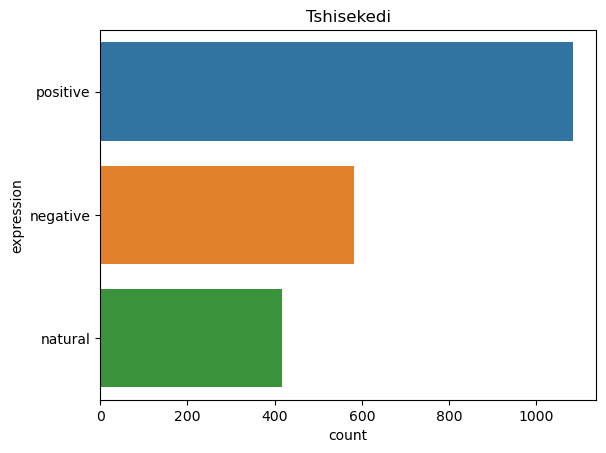

In [13]:
sns.countplot(y=tshisekedi['expression']).set(title="Tshisekedi")

[Text(0.5, 1.0, 'Katumbi')]

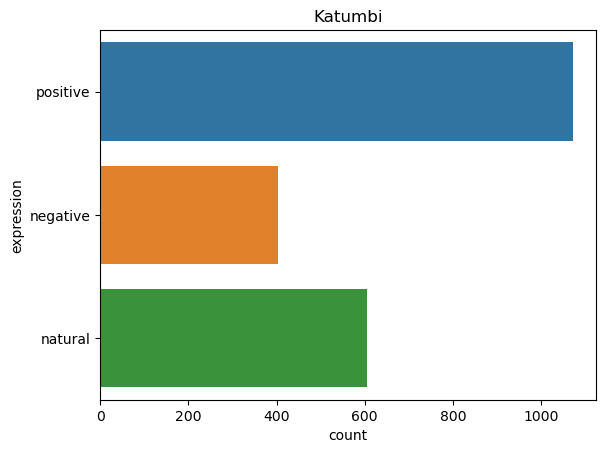

In [14]:
sns.countplot(y=katumbi['expression']).set(title="Katumbi")